In [1]:
from dotenv import load_dotenv
from src.agents import create_react_agent
from IPython.display import Image, display
from appworld import AppWorld, load_task_ids
from src.state import ReActState
from langchain.messages import HumanMessage
from src.utils.token_usage import calc_token_price

load_dotenv()

True

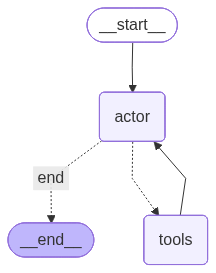

In [2]:
task_ids = load_task_ids(dataset_name='dev')

task_id = task_ids[0]

env = AppWorld(
    task_id=task_id,
    ground_truth_mode='full'
)

react_agent = create_react_agent(env=env)

display(Image(react_agent.get_graph().draw_mermaid_png()))

In [3]:
input_state: ReActState = {
    'messages' : [
        HumanMessage(content=f"{env.task.instruction}")
    ],
    'input_tokens' : 0,
    'output_tokens' : 0,
    'total_tokens' : 0
}

result = react_agent.invoke(input_state)


[Actor] ✅ Request succeed on attept 1/3
[Actor] ✅ Token usage is collected successfully.
[Conditional Edge] 🌏 Actor make tool call.
[Tool | Action] ✅ Action is performed successfully.

[Actor] ✅ Request succeed on attept 1/3
[Actor] ✅ Token usage is collected successfully.
[Conditional Edge] 🌏 Actor make tool call.
[Tool | Action] ✅ Action is performed successfully.

[Actor] ✅ Request succeed on attept 1/3
[Actor] ✅ Token usage is collected successfully.
[Conditional Edge] 🌏 Actor make tool call.
[Tool | Action] ✅ Action is performed successfully.

[Actor] ✅ Request succeed on attept 1/3
[Actor] ✅ Token usage is collected successfully.
[Conditional Edge] 🌏 Actor make tool call.
[Tool | Action] ✅ Action is performed successfully.

[Actor] ✅ Request succeed on attept 1/3
[Actor] ✅ Token usage is collected successfully.
[Conditional Edge] 🌏 Actor make tool call.
[Tool | Action] ✅ Action is performed successfully.

[Actor] ✅ Request succeed on attept 1/3
[Actor] ✅ Token usage is collected

In [4]:
eval_result = env.evaluate()

────────────────────────────────────────────────── Overall Stats ──────────────────────────────────────────────────

Num Passed Tests : 2

Num Failed Tests : 0

Num Total  Tests : 2

───────────────────────────────────────────────────── Passes ──────────────────────────────────────────────────────

>> Passed Requirement

assert answers match.

>> Passed Requirement

Assert no model changes

────────────────────────────────────────────────────── Fails ──────────────────────────────────────────────────────

None

In [5]:
print(f"Total task : {eval_result.total_count}")
print(f"    - Passed task : {eval_result.pass_count}")
print(f"    - Failed task : {eval_result.fail_count}")

Total task : 2
    - Passed task : 2
    - Failed task : 0


In [6]:
print(f"Total Tokens : {result['total_tokens']}")
print(f"    - Input Tokens : {result['input_tokens']}")
print(f"    - Output Tokens : {result['output_tokens']}")

Total Tokens : 165910
    - Input Tokens : 164882
    - Output Tokens : 1028


In [8]:
price_info = calc_token_price(
    model='gpt-4o',
    input_tokens=result['input_tokens'],
    output_tokens=result['output_tokens']
)

print(f"Total Price : {price_info['total_token_price']:.2f} $")
print(f"    - Input Tokens : {price_info['input_token_price']:.2f} $")
print(f"    - Output Tokens : {price_info['output_token_price']:.2f} $")

Total Price : 0.42 $
    - Input Tokens : 0.41 $
    - Output Tokens : 0.01 $
